# MIMIC-EYE 1.0 - An Eye-Tracking Data Analytics Toolkit for REFLACX and EYE GAZE

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
import os
import pickle as pkl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from mimic.Patient import Patient
from mimic.XrayStudy import XrayStudy
from mimic.Xray import Xray
from MIMIC_EYE import MIMIC_EYE 
from Constants import Constants as c
from data.eyegaze.BoundingBox import BoundingBox

from util.mimic_data_processing import *

In [3]:
# starting program
mimic_eye = MIMIC_EYE()

In [4]:
eye_gaze_sheet = os.path.join(c.DATASET_PATH, "spreadsheets", 'EyeGaze', "master_sheet_with_updated_stayId.csv")
eye_gaze_df = pd.read_csv( eye_gaze_sheet )

# extract all patient keys from EYE GAZE dataset
patient_keys = eye_gaze_df['patient_id'].values.tolist()[0:5]
for patient_key in patient_keys:
  
  # performs an inner join between the eye_gaze dataframe and the MIMIC core data on the patient_id key
  # this allows us to obtain all information about a patient
  # if there are multiple records of the patient (due to several visits to the hospital), we record the 
  # patient's information of his last visit to the hospital
  mimic_core = join_patients_mimic_core_data( patient_key, eye_gaze_df)

  # create a new Patient
  patient = Patient(mimic_core["patient_id"].tail(1).values[0], \
                    mimic_core["gender_x"].tail(1).values[0], \
                    mimic_core["language"].tail(1).values[0], \
                    mimic_core["marital_status"].tail(1).values[0],\
                    mimic_core["race"].tail(1).values[0], \
                    mimic_core["anchor_age_x"].tail(1).values[0], \
                    mimic_core["anchor_year"].tail(1).values[0], \
                    mimic_core["dod"].tail(1).values[0], \
                    mimic_core["anchor_year_group"].tail(1).values[0], {}, {}  )

  # get all CXR images associated to patient with patient_key
  xray_lst = []
  patient_df = eye_gaze_df[ eye_gaze_df[ "patient_id"] == patient_key ]
  for row in patient_df.itertuples():
    xray_id = row.dicom_id
    study_id = "s"+str(row.study_id)
    report = read_CXR_report( patient_key, study_id )

    # a patient can have many imagaeology studies, and each study is composed of at least one XRay image
    # one xray is given by an image file, a textual report with all the findings and diagnosis
    # and a set of 
    xray_dicom_path = c.MIMIC_DICOM_PATH(c.DATASET_PATH, patient_key, study_id, xray_id)
    xray_jpg_path = c.MIMIC_JPG_PATH(c.DATASET_PATH, patient_key, study_id, xray_id)
  
    bbox_lst = []
    bboxes_df = pd.read_csv( c.EYE_GAZE_BBOX_PATH(c.DATASET_PATH, patient_key) )
    for bbox in bboxes_df.itertuples():
      bbox = BoundingBox(bbox.x1, bbox.x2, bbox.y1, bbox.y2, bbox.bbox_name)
      bbox_lst.append( bbox )
      
    xray_lst.append( Xray(xray_id, study_id, report, xray_dicom_path, xray_jpg_path, bbox_lst))

    
    

  

  # find all Xrays belonging to patient with key patient_id
  
  #xrayStudy = XrayStudy(  )


  # create a new Xray
  
  


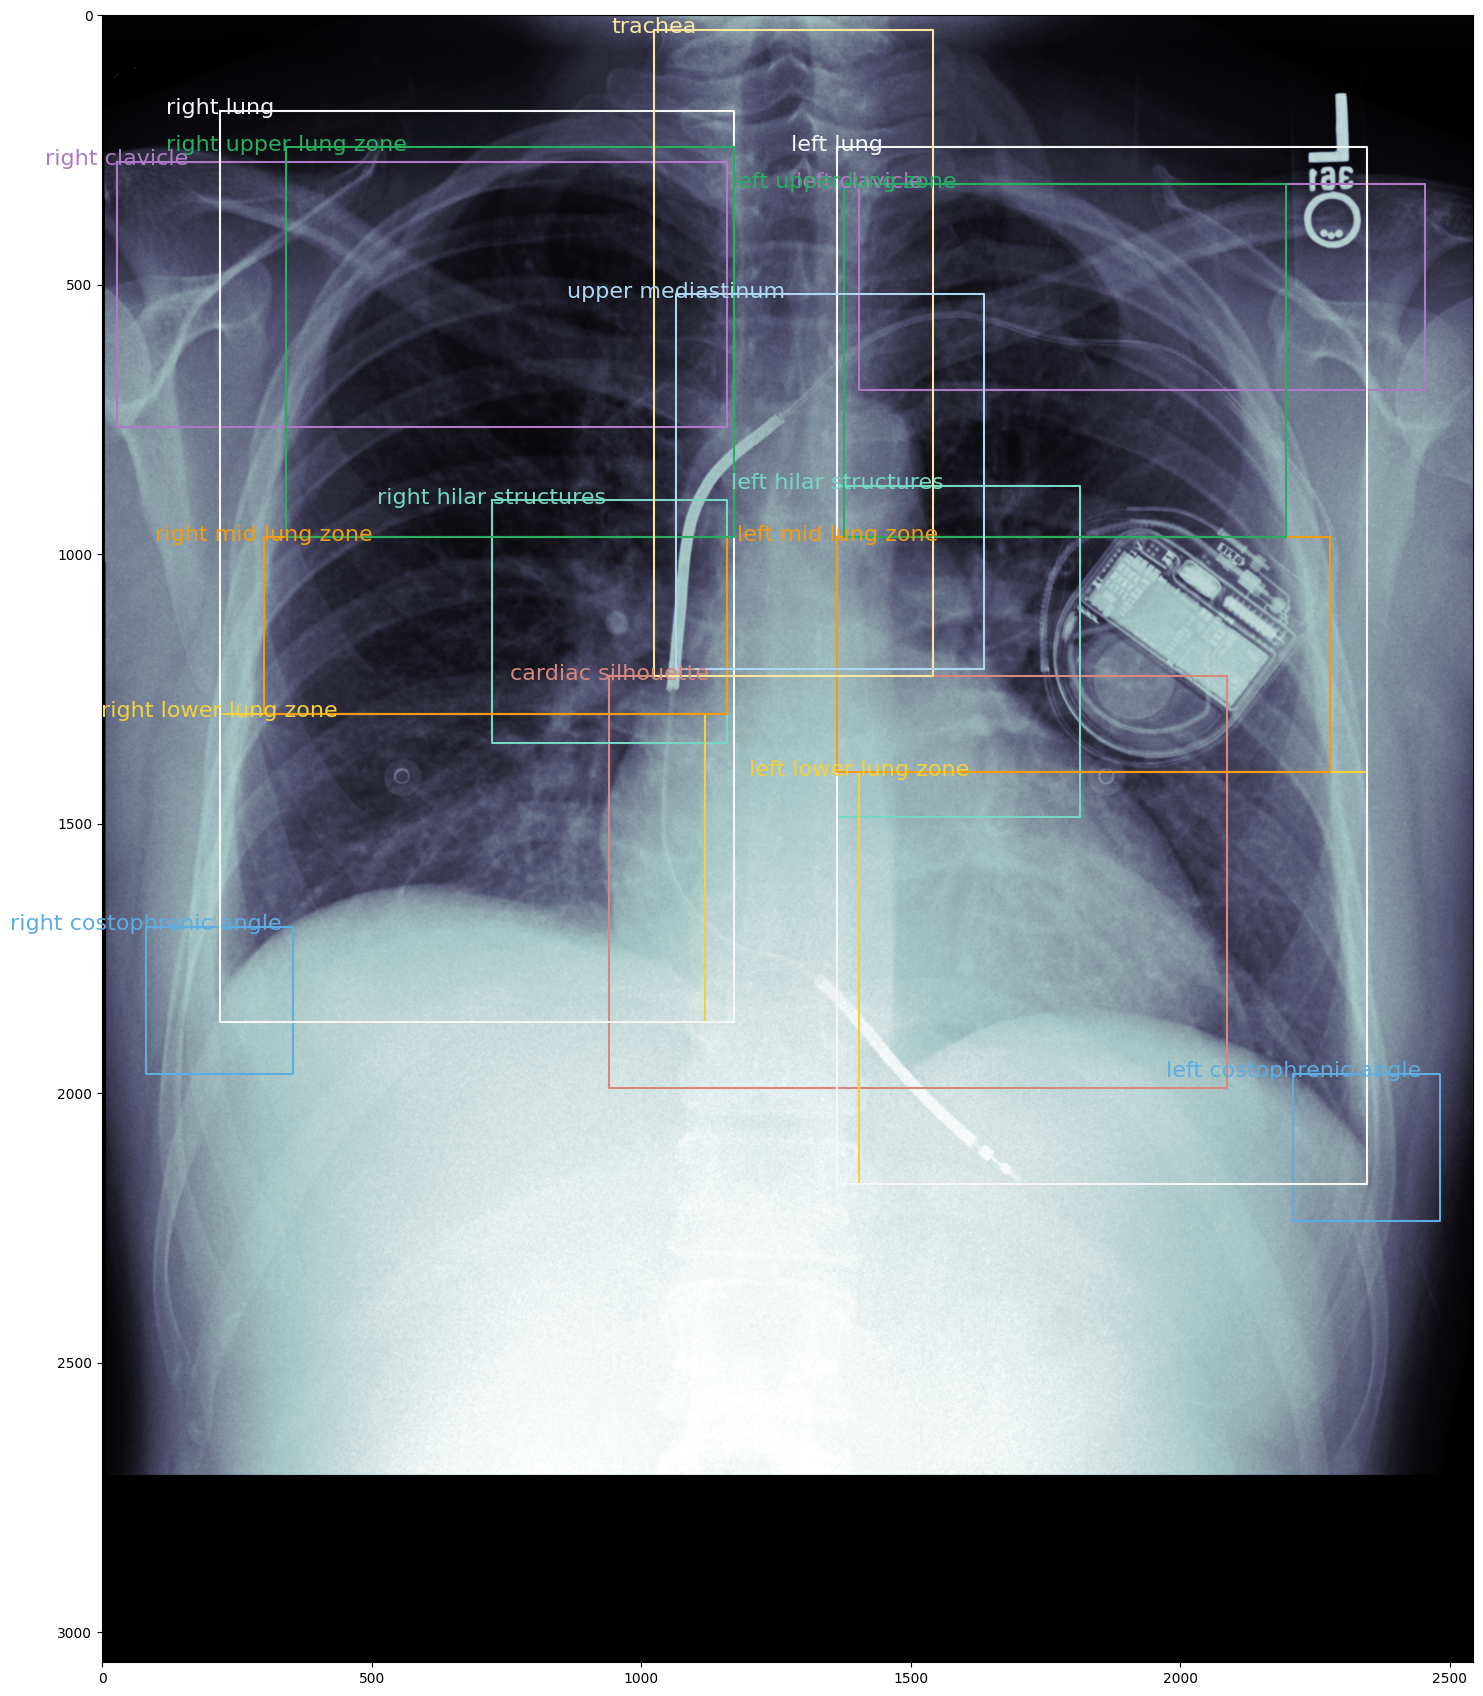

In [5]:
cxr = xray_lst[0]
cxr.plot_annotations(label=True)

In [12]:
eye_gaze_df[ eye_gaze_df["dicom_id"] == "62fe5d5a-1806ee3c-f4e742fa-f2b036ea-d390057a"]

dicom_id  \
4  62fe5d5a-1806ee3c-f4e742fa-f2b036ea-d390057a   

                                                path  study_id  patient_id  \
4  files/p12/p12055181/s59722264/62fe5d5a-1806ee3...  59722264    12055181   

      stay_id gender anchor_age  image_top_pad  image_bottom_pad  \
4  37532814.0      M    20 - 30              0                 0   

   image_left_pad  image_right_pad                         dx1 dx1_icd  dx2  \
4             534              534  Heart failure, unspecified   I50.9  NaN   

  dx2_icd  dx3 dx3_icd  dx4 dx4_icd  dx5 dx5_icd  dx6 dx6_icd  dx7  dx7_icd  \
4     NaN  NaN     NaN  NaN     NaN  NaN     NaN  NaN     NaN  NaN      NaN   

   dx8 dx8_icd  dx9  dx9_icd  normal_reports  Normal  CHF  pneumonia  \
4  NaN     NaN  NaN      NaN               0       0    1          0   

   consolidation  enlarged_cardiac_silhouette  linear__patchy_atelectasis  \
4              0                            1                           0   

   lobar__segmental_collapse  \
4                          0   

   not_otherwise_specified_opacity___pleural__parenchymal_opacity__  \
4                                                  1                  

   pleural_effusion_or_thickening  pulmonary_edema__hazy_opacity  \
4                               1                              0   

   normal_anatomically  elevated_hemidiaphragm  hyperaeration  \
4                    0                       0              0   

   vascular_redistribution  atelectasis__chx  cardiomegaly__chx  \
4                        0               NaN                1.0   

   consolidation__chx  edema__chx  enlarged_cardiomediastinum__chx  \
4                 NaN         0.0                              NaN   

   fracture__chx  lung_lesion__chx  lung_opacity__chx  no_finding__chx  \
4            NaN               NaN                1.0              NaN   

   pleural_effusion__chx  pleural_other__chx  pneumonia__chx  \
4                    1.0                 NaN            -1.0   

   pneumothorax__chx  support_devices__chx  \
4                NaN                   NaN   

                                 cxr_exam_indication  
4  ___M with DOE, SOB in supine position  // eval...

In [5]:
patient.getID()

15628804

In [13]:
sample.columns

Index(['Unnamed: 0_x', 'patient_id', 'gender_x', 'anchor_age_x', 'anchor_year',
       'anchor_year_group', 'dod', 'Unnamed: 0_y', 'hadm_id_x', 'admittime',
       'dischtime', 'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag', 'Unnamed: 0',
       'hadm_id_y', 'transfer_id', 'eventtype', 'careunit', 'intime',
       'outtime', 'dicom_id', 'path', 'study_id', 'stay_id', 'gender_y',
       'anchor_age_y', 'image_top_pad', 'image_bottom_pad', 'image_left_pad',
       'image_right_pad', 'dx1', 'dx1_icd', 'dx2', 'dx2_icd', 'dx3', 'dx3_icd',
       'dx4', 'dx4_icd', 'dx5', 'dx5_icd', 'dx6', 'dx6_icd', 'dx7', 'dx7_icd',
       'dx8', 'dx8_icd', 'dx9', 'dx9_icd', 'normal_reports', 'Normal', 'CHF',
       'pneumonia', 'consolidation', 'enlarged_cardiac_silhouette',
       'linear__patchy_atelectasis', 'lobar__segmental_collapse',
       'not_otherwise_speci

# MANIM

In [4]:
from manim import *

from manim.scene.scene import Scene
from manim.mobject.types.image_mobject import ImageMobject
import manim_ml
import cv2 
config.media_embed = True

In [47]:
image_p = cv2.imread("image.jpg")
image_p.shape

(3056, 2544, 3)

In [16]:
%%manim -qm  -r 3056,2544 -v WARNING CreateCircle

class CreateCircle(Scene):
    def construct(self):
        image = ImageMobject(cv2.imread("image.jpg"))
        image.height = 11.5
        print(image.width)

        self.add(image)

        lst = [ np.array([0., 0., 0.]), np.array([0., 2., 0.]), np.array([2., 0., 0.]), np.array([2., 2., 0.]) ]
        for l in lst:
            print(l)
            circle = Dot(point=l, radius=0.03, stroke_width=1, fill_opacity=0.80, color='#C70039')
            
            self.play(Create(circle))


9.573298429319374
[0. 0. 0.]


[0. 2. 0.]


[2. 0. 0.]


[2. 2. 0.]


In [16]:
# Create an instance of the MyAnimation class
animation = MyAnimation()

# Call the construct method to run the animation
animation.construct()

In [14]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

In [6]:


animation.construct()

TypeError: animate_dot() missing 1 required positional argument: 'coordinates'